# **An Array of Sequences**



> As you may have noticed, several of the operations mentioned work equally for texts,
 lists and tables. Texts, lists and tables together are called ‘trains’. [...] The FOR com
mand also works generically on trains.  —Leo Geurts, Lambert Meertens, and Steven Pembertonm, ABC Programmer’s
 Handbook1


**These are the main topics this chapter will cover:**

 • List comprehensions and the basics of generator expressions

 • Using tuples as records versus using tuples as immutable lists

 • Sequence unpacking and sequence patterns

 • Reading from slices and writing to slices

 • Specialized sequence types, like arrays and queues


## Overview of Built-In Sequences

*Container sequences*

can hold items of different types, including nested containers. Some examples: `list, tuple, and collections.deque`

*Flat sequences*

Hold items of one simple type. Some examples: `str, bytes, and array.array`

A `container sequence` holds references to the objects it contains, which may be of any type, while a `flat sequence` stores the value of its contents in its own memory space, not as distinct Python objects.

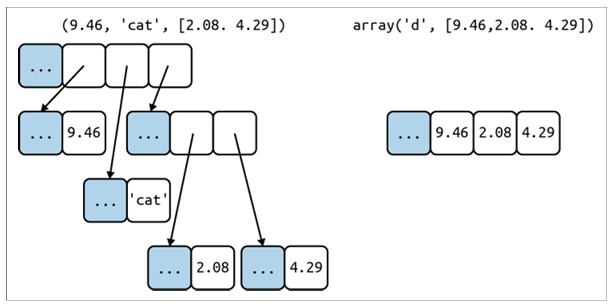

 Simplified memory diagrams for a tuple and an array, each with three
 items. Gray cells represent the in-memory header of each Python object—not drawn to
 proportion. The tuple has an array of references to its items. Each item is a separate
 Python object, possibly holding references to other Python objects, like that two-item
 list. In contrast, the Python array is a single object, holding a C language array of three
 doubles.

ANother way of grouping sequence types is by mutability:

*Mutable sequences*

for example, `list, bytearray, array.array, and collections.deque.`

*Immutable sequences*

for example, `tuple, str, and bytes.`

## List Comprehensions and Generator Expressions

### List Comprehensions and Readability


In [ ]:
# build a list of Unicode code points from a string

symbols = '$@&*%'
codes = []

for symbol in symbols:
  codes.append(ord(symbol))

print(codes)
print()

[36, 64, 38, 42, 37]



In [ ]:
# build a list of Unicode code points from a string, using a listcomp

symbols = '$@&*%'
codes = [ord(symbol) for symbol in symbols]

print(codes)

[36, 64, 38, 42, 37]


### Listcomps Versus map and filter

In [ ]:
#the same list built by a listcomp and a map/filter composition

symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]

print(beyond_ascii)

beyond_ascii = list(filter(lambda c: c > 127, map(ord, symbols)))
print(beyond_ascii)

[162, 163, 165, 8364, 164]
[162, 163, 165, 8364, 164]


### Cartesian Products

Listcomps can build lists from the Cartesian product of two or more iterables.

In [ ]:
#1
colors = ['black', 'white']
sizes = ['S', 'M', 'L']

tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [ ]:
#2
for color in colors:
  for size in sizes:
    print((color, size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


In [ ]:
#3
tshirts = [(color, size) for size in sizes
                          for color in colors]
tshirts

[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

1. This generates a list of tuples arranged by color, then size.
2. Note how the resulting list is arranged as if the for loops were nested in the same
 order as they appear in the listcomp.
3. To get items arranged by size, then color, just rearrange the for clauses; adding a
 line break to the listcomp makes it easier to see how the result will be ordered.

### Generator Expressions

In [ ]:
# Initializing a tuple and an array from a generator expression

symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [ ]:
import array
array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

1. If the generator expression is the single argument in a function call, there is no need to duplicate the enclosing parentheses.

2. The array constructor takes two arguments, so the parentheses around the generator expression are mandatory.
The first argument of the array constructor defines the storage type for the numbers in the array.

In [ ]:
# Cartesian product in a generator expression

colors = ["black", "white"]
sizes = ["S", "M", "L"]

for tshirt in (f'{c} {s}' for c in colors for s in sizes):
  print(tshirt)

black S
black M
black L
white S
white M
white L


The generator expression yields items one by one; a list with all six T-shirt varia
tions is never produced in this example.



> If the two lists used in the Cartesian product had a thousand items each, using a generator expression would save the cost of building a list with a
 million items just to feed the for loop.



## Tuples are not just Immutable Lists

In [ ]:
# Tuples used as records

lax_coordinates = (33.9425, -118.408056) #1
city, year, pop, chg, area = ('Tokyo', 2003, 32_450, 0.66, 8014) #2

traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')] #3
for passport in sorted(traveler_ids): #4
    print('%s/%s' % passport) #5



BRA/CE342567
ESP/XDA205856
USA/31195855


In [ ]:
for country, _ in traveler_ids: #6
  print(country)

USA
BRA
ESP


3. A list of tuples of the form (country_code, passport_number)
4. as we iterate over the list, passport is bound to each tuple.
5. The `%` formatting operator understands tuples and treats each item as a separate field.


### Tuples as Immutable Lists

Immutability of a `tuple` only applies to the references contained in it.

**References in a tuple cannot be deleted or replaced. But if one of those references points to a mutable object, and that object is changed, then the value of the `tuple` changes.**

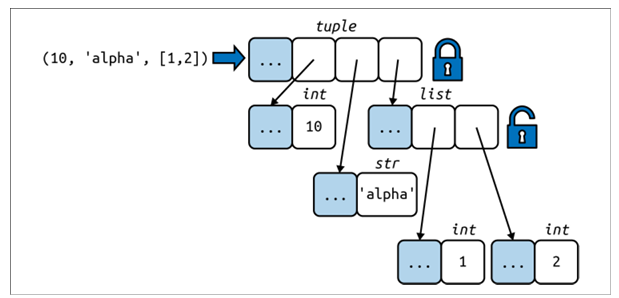

Here, we see that `list` is mutable so its content may change.

In [ ]:
a = (10, 'alpha', [1, 2])
b = (10, 'alpha', [1, 2])

a == b

True

In [ ]:
b[-1].append(99)
a == b

False

In [ ]:
b

(10, 'alpha', [1, 2, 99])

## Unpacking Sequences and Iterables

In [ ]:
lax_coordinates

(33.9425, -118.408056)

In [ ]:
 latitude, longitude = lax_coordinates  # unpacking
 latitude

33.9425

In [ ]:
import os
_, filename = os.path.split('/home/luciano/.ssh/id_rsa.pub')

filename

'id_rsa.pub'

another way of unpacking is prefixing an argument with * when calling a function:

In [ ]:
divmod(20, 8)

(2, 4)

In [ ]:
t = (20, 8)

divmod(*t)

(2, 4)

In [ ]:
quotient, remainder = divmod(*t)
quotient, remainder

(2, 4)

### Using * to grab excess items

In [ ]:
a, b, *rest = range(5)
a, b, rest

(0, 1, [2, 3, 4])

 In the context of parallel assignment, the * prefix can be applied to exactly one variable, but it can appear in any position.

### Nested Unpacking

In [ ]:
metro_areas = [
 ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
 ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
 ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
 ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
 ] #1

def main():
  print(f'{"":15} | {"lattitude":>9} | {"longitude":>9}')
  for name, _, _, (lat, lon) in metro_areas: #2
    if lon <= 0: #3
      print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')

if __name__ == '__main__':
  main()

                | lattitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


1. Each tuple holds a record with four fields, the last of which is a coordinate pair.
2. By assigning the last field to a nested tuple, we unpack the coordinates.
3. The lon <= 0: test selects only cities in the Western hemisphere.

## Pattern Matching with Sequences

In [ ]:
# Method from an imaginary Robert class

def handle_command(self, message): #1
  match message:
    case ['BEEPER', frequency, times]: #2
      self.beep(times, frequency)
    case ['NECK', angle]: #3
      self.rotate_neck(angle)
    case ['LED', ident, intensity]: #4
      self.leds[ident].set_brightness(ident, intensity)
    case ['LED', ident, red, green, blue]: #5
      self.leds[ident].set_color(ident, red, green, blue)
    case _: #6
      raise InvalidCommand(message)

1. The expression after the `mATCH` keyword is the `subject`. The subject is the data that Python will try to match to the patterns in each `case` clause.
2.  This pattern matches any subject that is a sequence with three items. The first
 item must be the string 'BEEPER'. The second and third item can be anything,
 and they will be bound to the variables frequency and times, in that order.
3. This matches any subject with two items, the first being 'NECK'.
4.  This will match a subject with three items starting with 'LED'. If the number of
 items does not match, Python proceeds to the next case.
5. Another sequence pattern starting with 'LED', now with five items—including
 the 'LED' constant.
6. This is the default case. It will match any subject that did not match a previous
 pattern. The _ variable is special.

In [ ]:
# Destructuring nested tuples-requires Python >= 3.10

metro_areas = [
 ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
 ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
 ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
 ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
 ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
 ]

def main():
  print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
  for record in metro_areas:
    match record: #1
      case [name, _, _, (lat, lon)] if lon <= 0: #2
        print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')

main()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


1. The subject of this `match` is record-- i.e, each of the tuples in `metro_areas`.
2. A `case` clause has two parts: a pattern and an optional guard with the `if` keyword.

In general, a sequence pattern matches the subject if:
1. the subject is a sequence and;
2. the subject and the pattern have the same number of items and;
3. Each corresponding item matches, including nested items.

Instances of `str, bytes` and `bytearray` are not handled as sequences in the context of `match/case`.
Treating those three types as sequences could cause bugs due to unintended matches.

## Slicing


### Assigning to Slices

In [2]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
l[2:5] = [20, 30]
l

[0, 1, 20, 30, 6, 7, 8, 9]

In [5]:
del l[5:7]
l

[0, 1, 20, 30, 6, 9]

In [6]:
l[3::2] = [11, 22]
l

[0, 1, 20, 11, 6, 22]

In [9]:
l[2:5] = 100 #1
l

TypeError: can only assign an iterable

In [10]:
l[2:5] = [100]
l

[0, 1, 100]

1. When the target of the assignment is a slice, the righthand side must be an iterable object, even if it has just one item.

## Using + and * with Sequences

### Building Lists of Lists

In [11]:
# a list with three list of length 3 can represent a tic-tac-toe board

board = [['_'] * 3 for i in range(3)] #1
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [12]:
board[1][2] = 'X' #2
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

1. create a list of three lists of three items each.
2. place a mark in row 1, column 2, and check the result

In [16]:
# the above code is equivalent to this code:
board = []
for i in range(3):
  row = ['_'] * 3 #1
  board.append(row)

board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [17]:
board[2][0] = 'X' #2
board

[['_', '_', '_'], ['_', '_', '_'], ['X', '_', '_']]

1. Each iteration builds a new row and appends it to board.
2. Only row 2 is changed, as expected

In [13]:
# a list with three references to the same list is useless

weird_board = [['_'] * 3] * 3 #1
weird_board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [14]:
weird_board[1][2] = 'O' #2
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

1. the outer list is made of three references to the same inner list. while it is unchanged, all seems right.
2. Placing a mark in row 1, column 2, reveals that all rows are aliases referring to the same object.

In [15]:
# the problem with the above code is that, in essence, it behaves like this:

row = ['_'] * 3
board = []
for i in range(3):
  board.append(row) #1

1. the same row is appended three times to board.

### Augmented Assignment with Sequences

augmented assignment operators `+=` and `*=`

The special method that makes `+=` work is `__iadd__` (for "in-place addition") and similar for `*=` is `__imul__`

In [18]:
# the unexpected result: item t2 is changed and an exception is raised

t = (1, 2, [30, 40])
t[2] += [50, 60]

TypeError: 'tuple' object does not support item assignment

In [19]:
t

(1, 2, [30, 40, 50, 60])

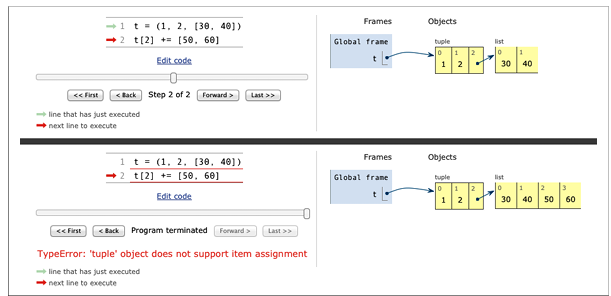



> Learning Lessons:
* Avoid putting mutable items in tuples
* Augmented assignment is not an atomic operation
* Inspecting Python bytecode is not too difficult, and can be helpful to see what is going on under the hood.



## list.sort versus the sorted Built-In

`list.sort` and `sorted` take two optional, keyword-only arguments:

`reverse` If True, the items are returned in descending order (i.e., by reversing the comparison of the items.) The default is False.

`key` A one-argument function that will be applied to each item to produce its sorting
 key. For example, when sorting a list of strings, key=str.lower can be used
 to perform a case-insensitive sort, and key=len will sort the strings by character
 length. The default is the identity function (i.e., the items themselves are
 compared).

In [20]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [21]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [22]:
sorted(fruits, reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [23]:
sorted(fruits, key=len)

['grape', 'apple', 'banana', 'raspberry']

In [24]:
sorted(fruits, key=len, reverse=True)

['raspberry', 'banana', 'grape', 'apple']

In [25]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [27]:
fruits.sort()
fruits

['apple', 'banana', 'grape', 'raspberry']

## When a List is not the Answer

### Memory Views

 A memoryview is essentially a generalized NumPy array structure in Python itself
 (without the math). It allows you to share memory between data-structures (things like
 PIL images, SQLite databases, NumPy arrays, etc.) without first copying. This is very
 important for large data sets.

### Deques and Other Queues

The `.append` and `.pop` methods make a list usable as a stack or a queue. But inserting and removing from the head os a list (the 0-index end) is costly because the entire list must be shifted in menory.

In [28]:
from collections import deque
dq = deque(range(10), maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
dq.rotate(3) #1
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [30]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [31]:
dq.extend([11, 22, 33])
dq

deque([4, 5, 6, 7, 8, 9, 0, 11, 22, 33])

In [32]:
dq.extendleft([10, 20, 30, 40]) #2
dq

deque([40, 30, 20, 10, 4, 5, 6, 7, 8, 9])

1.  Rotating with n > 0 takes items from the right end and prepends them to the
 left; when n < 0 items are taken from left and appended to the right.

2. Note that extendleft(iter) works by appending each successive item of the
 iter argument to the left of the deque, therefore the final position of the items is
 reversed.